In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

## 데이터 불러오기

In [ ]:
preprocessed_df = pd.read_pickle('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/대여시간구간화_60.pkl')
preprocessed_df

In [ ]:
industry_n_ratio_t_cluster = pd.read_pickle('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/군집별_산업군별_사업체수.pkl')
industry_n_ratio_t_cluster

,"농업, 임업 및 어업",광업,제조업,"전기, 가스, 증기 및 공기조절 공급업","수도, 하수 및 폐기물 처리, 원료 재생업",건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,"전문, 과학 및 기술 서비스업","사업시설 관리, 사업 지원 및 임대 서비스업","공공행정, 국방 및 사회보장 행정",교육 서비스업,보건업 및 사회복지 서비스업,"예술, 스포츠 및 여가관련 서비스업","협회 및 단체, 수리 및 기타 개인 서비스업"
Cluster_num,,,,,,,,,,,,,,,,,,,
0.0,0.009099,0.000000,2.538595,0.181978,0.060659,2.787298,26.656759,6.351036,16.611568,4.109672,1.428528,6.566377,5.292530,1.880440,0.169846,8.343696,4.652573,3.029935,9.329411
1.0,0.020456,0.006744,11.744566,0.025630,0.206305,3.176019,22.770798,10.519173,17.368885,0.684887,0.872958,4.938579,2.390910,1.427256,0.221293,5.495243,4.395992,3.267223,10.467083
2.0,0.034811,0.003133,15.920245,0.035087,0.235021,3.446622,25.388235,9.256231,15.155756,0.967704,0.634698,4.792431,2.524390,1.646838,0.155107,4.486563,3.619912,2.941935,8.755282
3.0,0.024701,0.000000,5.710140,0.029373,0.146494,3.248063,26.252603,11.955429,16.599557,0.650086,0.759758,4.742950,1.996898,1.619831,0.168393,6.692278,4.416799,3.571746,11.414900
4.0,0.239177,0.000000,5.166228,0.083712,0.298972,5.524994,19.600574,6.780674,29.490552,0.597943,0.681655,6.099019,2.128677,1.219804,0.597943,4.460655,3.910548,3.145181,9.973691


In [ ]:
industry_p_ratio_t_cluster = pd.read_pickle('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/군집별_산업군별_종사자수.pkl')
industry_p_ratio_t_cluster

,"농업, 임업 및 어업",광업,제조업,"전기, 가스, 증기 및 공기조절 공급업","수도, 하수 및 폐기물 처리, 원료 재생업",건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,"전문, 과학 및 기술 서비스업","사업시설 관리, 사업 지원 및 임대 서비스업","공공행정, 국방 및 사회보장 행정",교육 서비스업,보건업 및 사회복지 서비스업,"예술, 스포츠 및 여가관련 서비스업","협회 및 단체, 수리 및 기타 개인 서비스업"
Cluster_num,,,,,,,,,,,,,,,,,,,
0.0,0.011169,0.000000,3.316131,0.386307,0.107089,6.067913,14.641565,2.131588,8.373601,19.300574,3.203458,4.056553,10.746302,6.803736,1.204253,7.027439,7.883162,1.567237,3.171923
1.0,0.020742,0.016383,18.515754,0.219185,0.500086,5.751802,14.910058,4.770761,10.784525,1.299697,2.392736,2.772405,4.342696,3.941774,3.561853,9.510147,10.162503,2.159226,4.367666
2.0,0.047520,0.003998,23.330116,0.158265,0.705837,5.420920,19.125483,5.241460,9.922955,1.415499,1.563808,2.591003,3.146677,3.050614,2.372052,6.885737,8.946388,2.032260,4.039409
3.0,0.035334,0.000000,6.407127,0.103638,0.459169,6.064923,19.985625,6.085845,12.384549,0.902868,2.429646,3.388393,3.011984,4.447863,2.543673,10.418020,12.087376,2.983892,6.260076
4.0,0.509752,0.000000,4.923537,0.195354,0.741736,9.868441,14.276121,3.467538,20.979213,0.744788,1.962700,2.762431,2.194683,1.120234,5.888099,9.444156,12.688868,3.388175,4.844174


In [ ]:
leisure2030 = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/경기도2030_주말이나휴일의여가활용.csv',encoding='cp949')
leisure2030.columns = leisure2030.loc[0]
leisure2030 = leisure2030[leisure2030['구분별(1)']=='연령별']
leisure2030 = leisure2030[(leisure2030['구분별(2)']=='20 - 29세') | (leisure2030['구분별(2)']=='30 - 39세')]
leisure2030 = leisure2030.drop(['구분별(1)'],axis=1)
leisure2030.columns = ['연령대', 'TV 시청', '문화 예술 관람', '문화예술참여', '스포츠 관람', '스포츠 활동', '관광 활동',
       '컴퓨터 게임 인터넷 검색 등', '취미 자기 개발 활동', '휴식 활동', '사회 및 기타활동', '기타']
leisure2030 = leisure2030.set_index(['연령대'],drop=True)
leisure2030 = leisure2030.astype('float')
leisure2030

,TV 시청,문화 예술 관람,문화예술참여,스포츠 관람,스포츠 활동,관광 활동,컴퓨터 게임 인터넷 검색 등,취미 자기 개발 활동,휴식 활동,사회 및 기타활동,기타
연령대,,,,,,,,,,,
20 - 29세,34.9,39.6,2.0,4.0,7.9,7.2,37.4,13.3,31.7,5.0,1.5
30 - 39세,47.6,29.5,1.4,3.1,7.6,18.8,17.6,9.6,36.0,6.5,4.0


### Cluster별 대여시간 비율

In [ ]:
cluster_distribution = pd.pivot_table(preprocessed_df, index='Cluster_num', columns='대여시간구간화', values='컬럼6', aggfunc='count', fill_value=0)

cluster_ratio = cluster_distribution.T.div(cluster_distribution.T.sum(), axis=1, level=1)*100
cluster_ratio

Cluster_num,0,1,2,3,4
대여시간구간화,,,,,
주말_1구간_단시간,0.598917,0.607918,0.552985,0.606192,0.364078
주말_1구간_장시간,1.934293,1.721873,1.645268,1.512222,1.254045
주말_1구간_중시간,0.746905,0.809154,0.736401,0.775665,0.647249
주말_1구간_초단시간,0.426554,0.537191,0.557092,0.530147,0.242718
주말_1구간_초장시간,0.860073,0.788104,0.667962,0.612710,1.051780
주말_2구간_단시간,2.909275,2.621963,2.688275,2.889734,4.368932
주말_2구간_장시간,3.919077,3.332604,3.123546,3.115698,2.305825
주말_2구간_중시간,4.380452,4.150178,4.120014,4.267246,6.755663
주말_2구간_초단시간,1.667914,1.696614,1.502915,1.546985,2.629450


### 대여시간별 최다비율 Cluster 

In [ ]:
cluster_ratio_max = cluster_ratio.copy()
cluster_ratio_max = cluster_ratio_max.astype(float)

In [ ]:
for i in cluster_ratio_max.index:
  cluster_ratio_max.loc[i,'최다군집'] = cluster_ratio_max.loc[i].argmax()

cluster_ratio_max

Cluster_num,0,1,2,3,4,최다군집
대여시간구간화,,,,,,
주말_1구간_단시간,0.598917,0.607918,0.552985,0.606192,0.364078,1.0
주말_1구간_장시간,1.934293,1.721873,1.645268,1.512222,1.254045,0.0
주말_1구간_중시간,0.746905,0.809154,0.736401,0.775665,0.647249,1.0
주말_1구간_초단시간,0.426554,0.537191,0.557092,0.530147,0.242718,2.0
주말_1구간_초장시간,0.860073,0.788104,0.667962,0.612710,1.051780,4.0
주말_2구간_단시간,2.909275,2.621963,2.688275,2.889734,4.368932,4.0
주말_2구간_장시간,3.919077,3.332604,3.123546,3.115698,2.305825,0.0
주말_2구간_중시간,4.380452,4.150178,4.120014,4.267246,6.755663,4.0
주말_2구간_초단시간,1.667914,1.696614,1.502915,1.546985,2.629450,4.0


#### Cluster0 비율이 가장 높은 대여구간

In [ ]:
cluster_ratio_max[cluster_ratio_max['최다군집']==0]

Cluster_num,0,1,2,3,4,최다군집
대여시간구간화,,,,,,
주말_1구간_장시간,1.934293,1.721873,1.645268,1.512222,1.254045,0.0
주말_2구간_장시간,3.919077,3.332604,3.123546,3.115698,2.305825,0.0
주말_3구간_장시간,0.637220,0.548979,0.561198,0.534492,0.364078,0.0
주말_3구간_중시간,2.658565,2.133607,2.268061,2.363933,2.508091,0.0
주말_3구간_초단시간,1.265735,1.198154,1.207260,1.151548,1.173139,0.0
주말_5구간_장시간,0.400439,0.381422,0.331244,0.347637,0.161812,0.0
주말_5구간_초장시간,0.490973,0.484987,0.464015,0.369364,0.040453,0.0
평일_1구간_초장시간,0.882706,0.763687,0.730926,0.634438,0.202265,0.0
평일_4구간_장시간,2.604593,1.778287,1.814996,1.846822,1.537217,0.0


#### Cluster1 비율이 가장 높은 대여구간

In [ ]:
cluster_ratio_max[cluster_ratio_max['최다군집']==1]

Cluster_num,0,1,2,3,4,최다군집
대여시간구간화,,,,,,
주말_1구간_단시간,0.598917,0.607918,0.552985,0.606192,0.364078,1.0
주말_1구간_중시간,0.746905,0.809154,0.736401,0.775665,0.647249,1.0
평일_1구간_단시간,0.995874,1.262146,1.053957,1.125475,0.930421,1.0
평일_1구간_장시간,2.914498,2.934341,2.521284,2.322651,1.658576,1.0
평일_1구간_중시간,1.274440,1.572841,1.141559,1.136339,1.254045,1.0
평일_2구간_단시간,2.188485,2.589125,2.268061,2.511678,2.346278,1.0
평일_2구간_초단시간,1.542560,1.767341,1.705494,1.668658,1.537217,1.0


#### Cluster2 비율이 가장 높은 대여구간

In [ ]:
cluster_ratio_max[cluster_ratio_max['최다군집']==2]

Cluster_num,0,1,2,3,4,최다군집
대여시간구간화,,,,,,
주말_1구간_초단시간,0.426554,0.537191,0.557092,0.530147,0.242718,2.0
주말_4구간_중시간,1.467695,1.454120,1.538504,1.483976,1.011327,2.0
주말_4구간_초단시간,2.987621,3.069902,3.222098,3.093971,2.305825,2.0
주말_5구간_중시간,0.430036,0.443730,0.464015,0.456274,0.364078,2.0
평일_1구간_초단시간,0.783467,1.213310,1.320868,1.077675,0.444984,2.0
평일_4구간_초단시간,2.470533,2.760049,2.873060,2.748506,2.750809,2.0
평일_5구간_중시간,1.286627,1.300877,1.461852,1.423140,0.930421,2.0
평일_5구간_초단시간,4.364782,4.646111,4.673000,4.575774,1.739482,2.0
평일_6구간_중시간,0.506642,0.541401,0.585836,0.536665,0.485437,2.0


#### Cluster3 비율이 가장 높은 대여구간

In [ ]:
cluster_ratio_max[cluster_ratio_max['최다군집']==3]

Cluster_num,0,1,2,3,4,최다군집
대여시간구간화,,,,,,
주말_4구간_단시간,2.999808,2.832460,3.118071,3.200435,2.548544,3.0
주말_5구간_단시간,1.027212,1.124059,1.147034,1.338403,0.809061,3.0
주말_5구간_초단시간,2.345178,2.407255,2.492540,2.839761,0.849515,3.0
평일_3구간_장시간,1.499034,1.382551,1.500178,1.523085,1.415858,3.0
평일_4구간_중시간,2.839633,2.909924,3.144077,3.183053,2.791262,3.0
평일_5구간_단시간,3.372391,3.325026,3.623149,3.747963,1.779935,3.0
평일_6구간_단시간,1.222209,1.436438,1.654850,1.699077,0.930421,3.0
평일_6구간_초단시간,2.975434,2.973915,3.176928,3.359044,1.051780,3.0
평일_7구간_단시간,0.396957,0.515299,0.462646,0.527974,0.242718,3.0


#### Cluster4 비율이 가장 높은 대여구간

In [ ]:
cluster_ratio_max[cluster_ratio_max['최다군집']==4]

Cluster_num,0,1,2,3,4,최다군집
대여시간구간화,,,,,,
주말_1구간_초장시간,0.860073,0.788104,0.667962,0.612710,1.051780,4.0
주말_2구간_단시간,2.909275,2.621963,2.688275,2.889734,4.368932,4.0
주말_2구간_중시간,4.380452,4.150178,4.120014,4.267246,6.755663,4.0
주말_2구간_초단시간,1.667914,1.696614,1.502915,1.546985,2.629450,4.0
주말_2구간_초장시간,1.854205,1.587997,1.437214,1.340576,4.207120,4.0
주말_3구간_단시간,1.906437,1.896166,1.987462,2.022814,2.548544,4.0
주말_3구간_초장시간,0.616327,0.561609,0.507816,0.475828,1.456311,4.0
주말_4구간_장시간,0.409144,0.376370,0.336719,0.343292,0.728155,4.0
주말_4구간_초장시간,1.048105,0.937979,0.795259,0.697447,1.294498,4.0


## Cluster0 가설

* 평일 1구간(출퇴근) 장시간

* 평일 4구간(퇴출근) 장시간

* 평일 4구간 초단시간

* 주말 3구간 초단시간, 평일 5구간 초단시간

* 수입 차종 수요 

### Cluster0 가설에 해당하는 feature

In [ ]:
cluster0_hypotheses = cluster_ratio.loc[['평일_1구간_장시간','평일_4구간_장시간','평일_4구간_초단시간','주말_3구간_초단시간','평일_5구간_초단시간']]
cluster0_hypotheses

Cluster_num,0,1,2,3,4
대여시간구간화,,,,,
평일_1구간_장시간,2.914498,2.934341,2.521284,2.322651,1.658576
평일_4구간_장시간,2.604593,1.778287,1.814996,1.846822,1.537217
평일_4구간_초단시간,2.470533,2.760049,2.873060,2.748506,2.750809
주말_3구간_초단시간,1.265735,1.198154,1.207260,1.151548,1.173139
평일_5구간_초단시간,4.364782,4.646111,4.673000,4.575774,1.739482


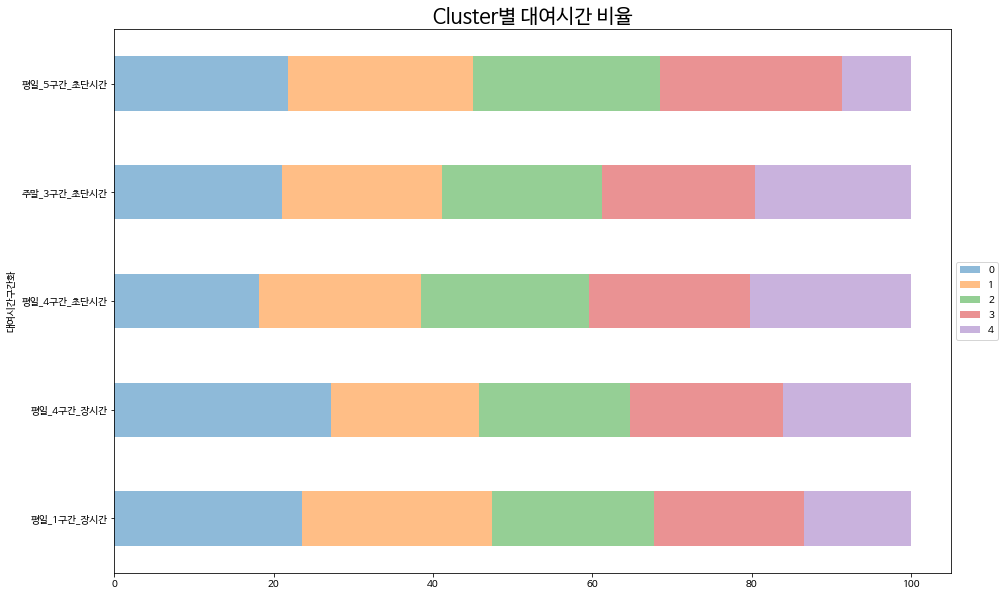

In [ ]:
cluster0_ratio = cluster0_hypotheses.T.div(cluster0_hypotheses.T.sum(), axis=1, level=1)*100

cluster0_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cluster별 대여시간 비율', fontsize=20);

### 1번 가설

#### 평일 1구간 장시간(채택)

* 2위- feature 채택

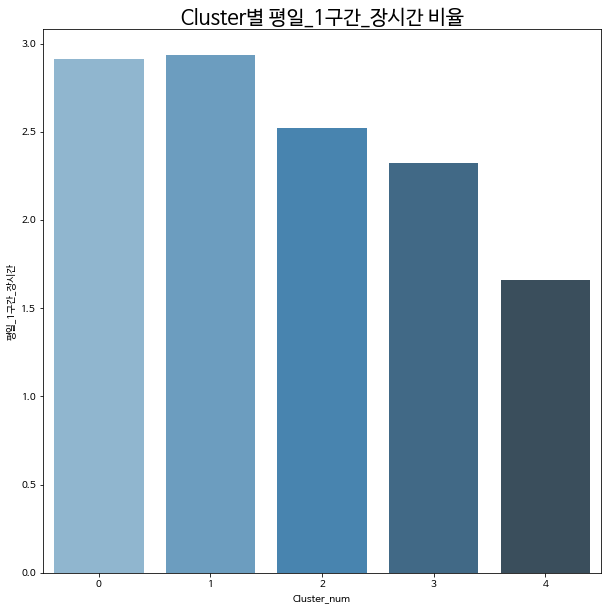

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_1구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster0_hypotheses.loc['평일_1구간_장시간'].index,
            y=cluster0_hypotheses.loc['평일_1구간_장시간'],
            palette='Blues_d')

#### 평일 4구간 장시간(채택)

* 1위- feature 채택

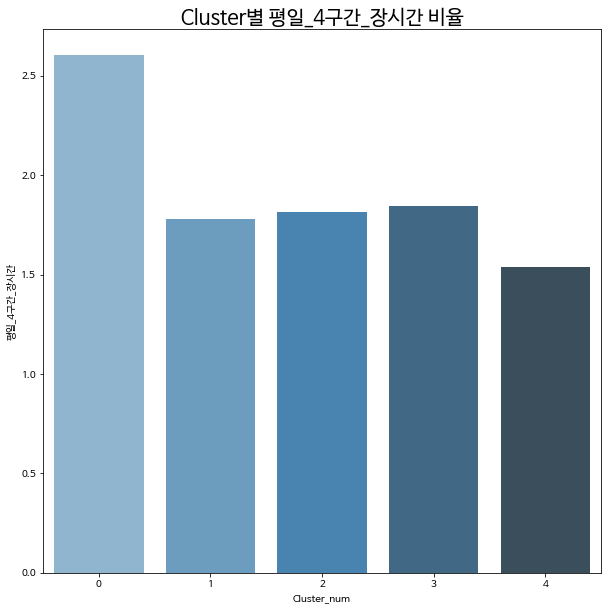

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_4구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster0_hypotheses.loc['평일_4구간_장시간'].index,
            y=cluster0_hypotheses.loc['평일_4구간_장시간'],
            palette='Blues_d')

#### 평일 5구간 장시간(채택)

* 1위- feature 채택

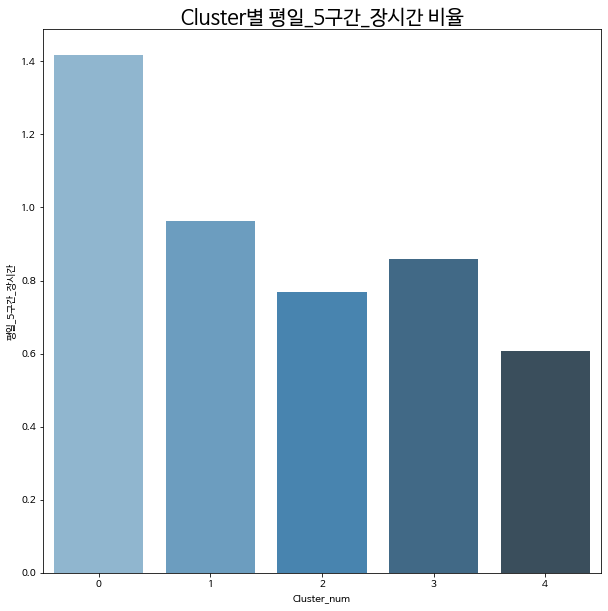

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_5구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_5구간_장시간'].index,
            y=cluster_ratio.loc['평일_5구간_장시간'],
            palette='Blues_d')

#### 군집별 정보통신, 과학기술 사업체 비율

In [ ]:
industry_p_ratio_t_cluster[['전문, 과학 및 기술 서비스업','정보통신업']]

,"전문, 과학 및 기술 서비스업",정보통신업
Cluster_num,,
0.0,10.746302,19.300574
1.0,4.342696,1.299697
2.0,3.146677,1.415499
3.0,3.011984,0.902868
4.0,2.194683,0.744788


Text(0.5, 0.98, 'Cluster별 산업 비율(사업체수)')

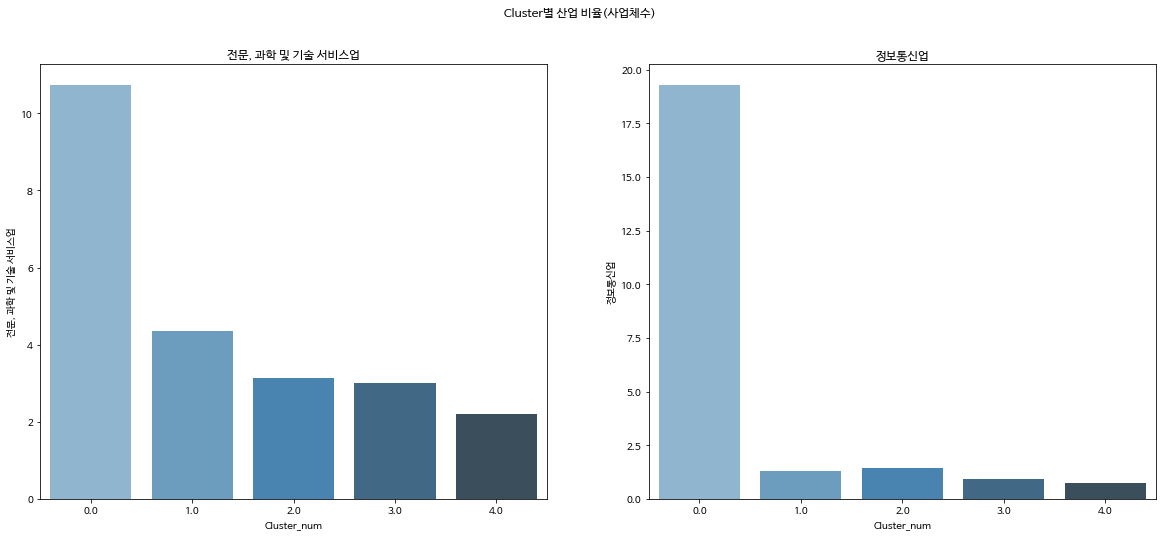

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(x=industry_p_ratio_t_cluster['전문, 과학 및 기술 서비스업'].index,
            y=industry_p_ratio_t_cluster['전문, 과학 및 기술 서비스업'],
            palette='Blues_d',
            ax = axes[0])
sns.barplot(x=industry_p_ratio_t_cluster['정보통신업'].index,
            y=industry_p_ratio_t_cluster['정보통신업'],
            palette='Blues_d',
            ax = axes[1])
axes[0].set_title('전문, 과학 및 기술 서비스업')
axes[1].set_title('정보통신업')
plt.suptitle('Cluster별 산업 비율(사업체수)')

### 2번 가설

#### 군집별 컬럼5 비율


In [ ]:
feature5_distribution = pd.pivot_table(preprocessed_df, index='Cluster_num', columns='컬럼5', values='컬럼6', aggfunc='count', fill_value=0)

feature5_ratio = feature5_distribution.T.div(feature5_distribution.T.sum(), axis=1, level=1)*100

feature5_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(['A','B'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('클러스터별 연령분포', fontsize=20);

#### 연령별 여가 시간 활용 비율

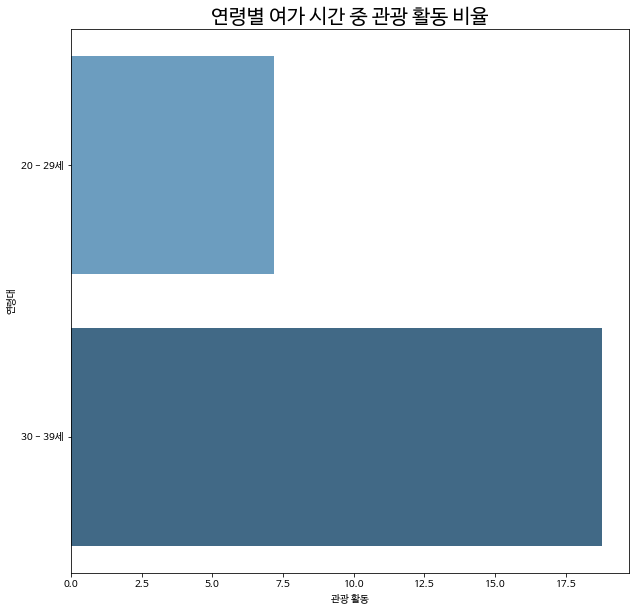

In [ ]:
plt.figure(figsize=(10,10))
plt.title('연령별 여가 시간 중 관광 활동 비율', fontsize=20)

sns.barplot(y=leisure2030.index,
            x=leisure2030['관광 활동'],
            palette='Blues_d')

#### 주말 장시간, 초장시간 이용(채택)

* 2위- feature 채택

In [ ]:
cluster_total_hour_distribution = pd.pivot_table(preprocessed_df[(preprocessed_df['컬럼17']==1)], index='Cluster_num', columns='컬럼15_bin', values='컬럼7', aggfunc='count', fill_value=0)
cluster_total_hour_distribution['장시간+초장시간']=cluster_total_hour_distribution['장시간']+cluster_total_hour_distribution['초장시간']
cluster_total_hour_distribution = cluster_total_hour_distribution.drop(['장시간','초장시간'],axis=1)

cluster_total_hour_ratio = cluster_total_hour_distribution.T.div(cluster_total_hour_distribution.T.sum(), axis=1, level=1)*100
cluster_total_hour_ratio

Cluster_num,0,1,2,3,4
total_hours_bin,,,,,
단시간,23.611111,24.088879,25.335135,26.525701,25.337187
중시간,24.216301,23.845467,24.356211,24.651882,26.878613
초단시간,21.738941,23.628852,23.969025,24.164804,17.148362
장시간+초장시간,30.433647,28.436802,26.339628,24.657613,30.635838


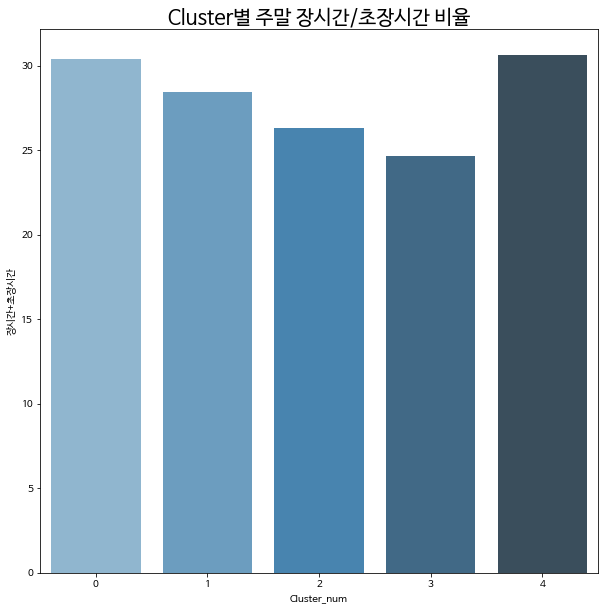

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말 장시간/초장시간 비율', fontsize=20)

sns.barplot(x=cluster_total_hour_ratio.loc['장시간+초장시간'].index,
            y=cluster_total_hour_ratio.loc['장시간+초장시간'],
            palette='Blues_d')

#### 주말 1구간 장시간(채택)

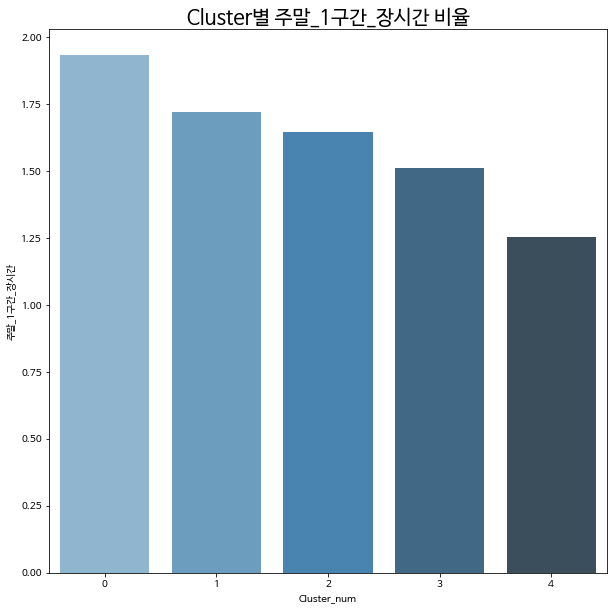

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_1구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_1구간_장시간'].index,
            y=cluster_ratio.loc['주말_1구간_장시간'],
            palette='Blues_d')

#### 주말 1구간 초장시간(채택)

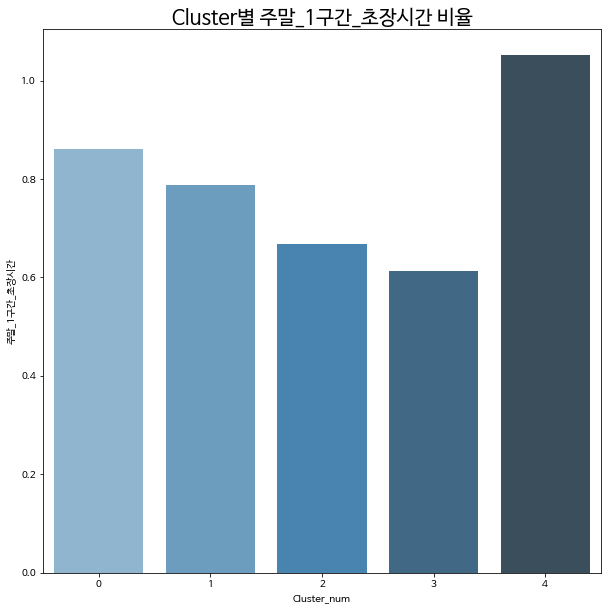

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_1구간_초장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_1구간_초장시간'].index,
            y=cluster_ratio.loc['주말_1구간_초장시간'],
            palette='Blues_d')

#### 주말 2구간 장시간(채택)

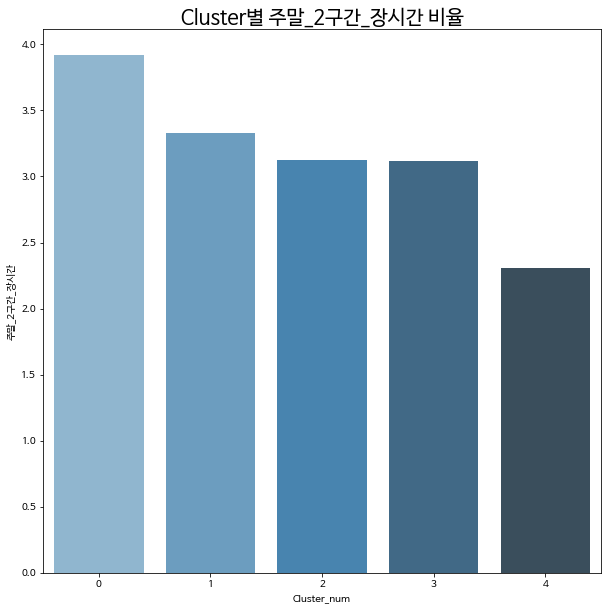

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_2구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_2구간_장시간'].index,
            y=cluster_ratio.loc['주말_2구간_장시간'],
            palette='Blues_d')

#### 주말 2구간 초장시간(채택)

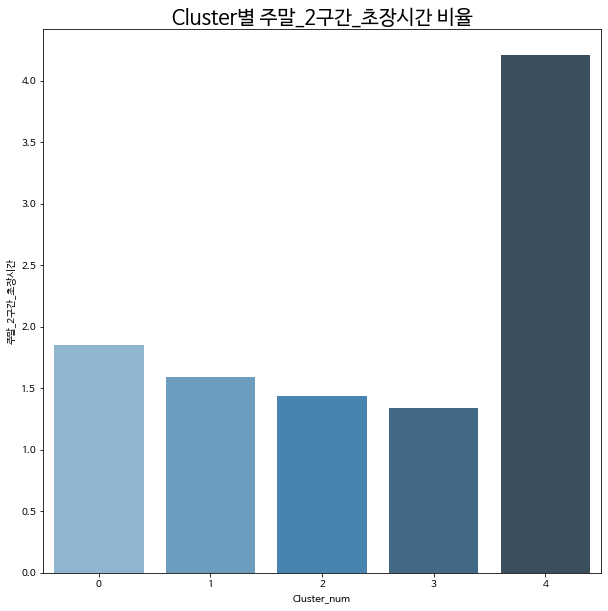

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_2구간_초장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_2구간_초장시간'].index,
            y=cluster_ratio.loc['주말_2구간_초장시간'],
            palette='Blues_d')

### 3번 가설

#### 평일 4구간 초단시간(기각)

* 5위- feature 기각

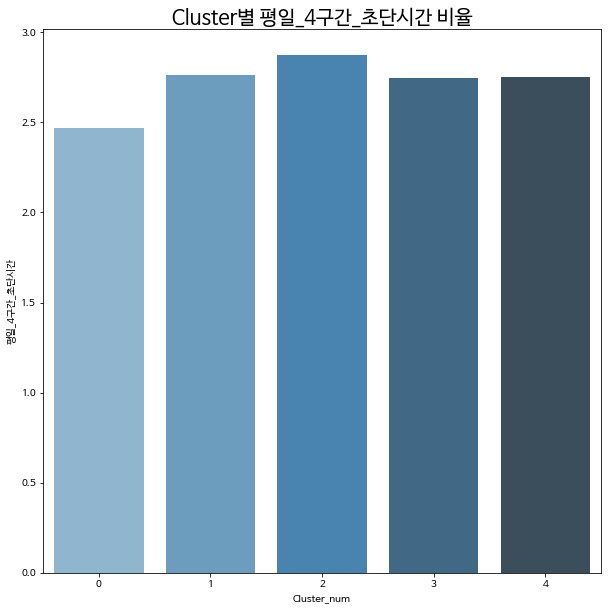

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_4구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster0_hypotheses.loc['평일_4구간_초단시간'].index,
            y=cluster0_hypotheses.loc['평일_4구간_초단시간'],
            palette='Blues_d')

### 4번 가설

#### 주말 3구간 초단시간(채택)

* 1위- feature 채택

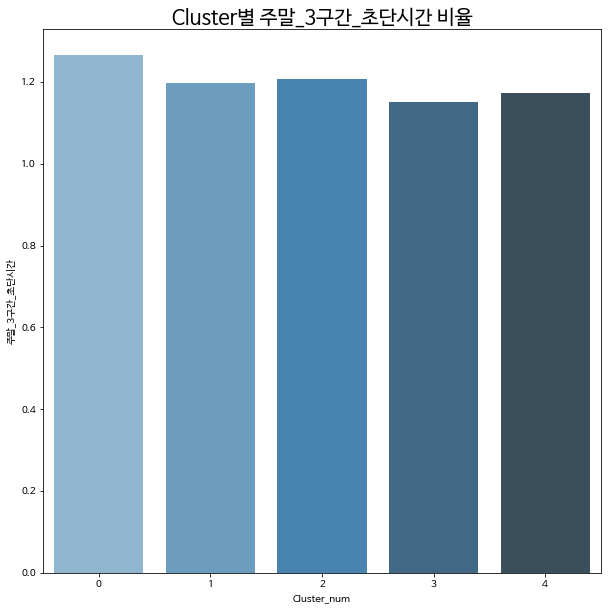

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_3구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster0_hypotheses.loc['주말_3구간_초단시간'].index,
            y=cluster0_hypotheses.loc['주말_3구간_초단시간'],
            palette='Blues_d')

#### 평일 5구간 초단시간(기각)

* 4위- feature 기각

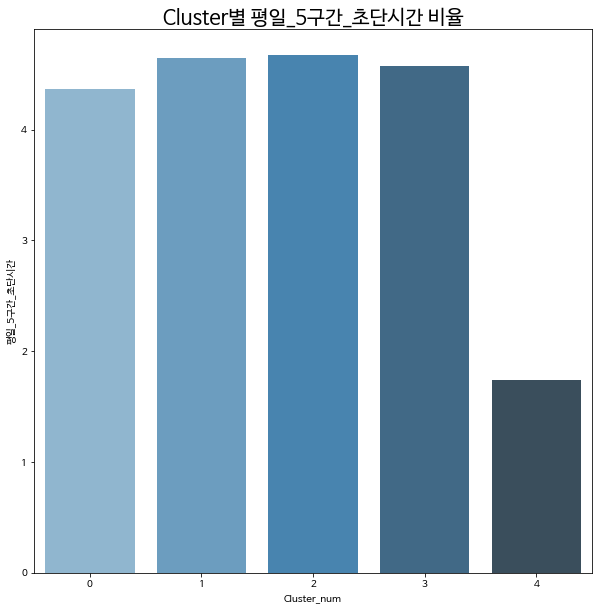

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_5구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster0_hypotheses.loc['평일_5구간_초단시간'].index,
            y=cluster0_hypotheses.loc['평일_5구간_초단시간'],
            palette='Blues_d')

#### 평일 구간별 분포

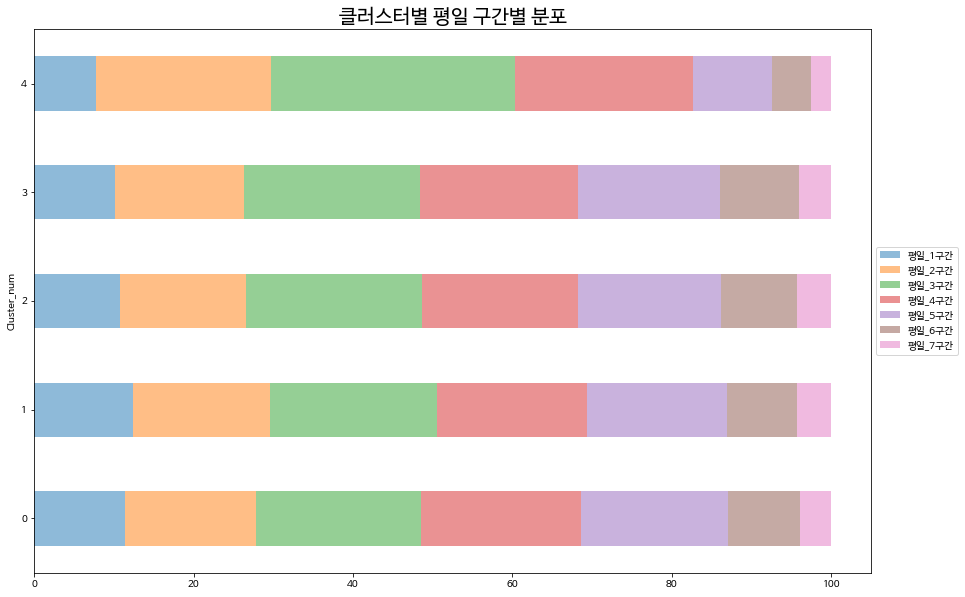

In [ ]:
weekday_distribution = pd.pivot_table(preprocessed_df[preprocessed_df['컬럼17']==0], index='Cluster_num', columns='컬럼13_bin', values='컬럼6', aggfunc='count', fill_value=0)

weekday_ratio = weekday_distribution.T.div(weekday_distribution.T.sum(), axis=1, level=1)*100

weekday_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('클러스터별 평일 구간별 분포', fontsize=20);

### 컬럼7 분포



In [ ]:
feature7_distribution = pd.pivot_table(preprocessed_df, index='Cluster_num', columns='컬럼7', values='컬럼6', aggfunc='count', fill_value=0)

feature7_ratio = feature7_distribution.T.div(feature7_distribution.T.sum(), axis=1, level=1)*100

feature7_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('클러스터별 컬럼7분포', fontsize=20);

In [ ]:
preprocessed_df.groupby('컬럼7').mean()

## Cluster1 가설

* 평일 3구간 초단시간

* 평일 5구간 초단시간

* 주말 3구간 초단시간

* 4,5,10,11월 중,장시간

In [ ]:
cluster1_hypotheses = cluster_ratio.loc[['평일_3구간_초단시간','평일_5구간_초단시간','주말_3구간_초단시간']]
cluster1_hypotheses

Cluster_num,0,1,2,3,4
대여시간구간화,,,,,
평일_3구간_초단시간,2.552362,2.982335,3.181034,3.256926,3.317152
평일_5구간_초단시간,4.364782,4.646111,4.673000,4.575774,1.739482
주말_3구간_초단시간,1.265735,1.198154,1.207260,1.151548,1.173139


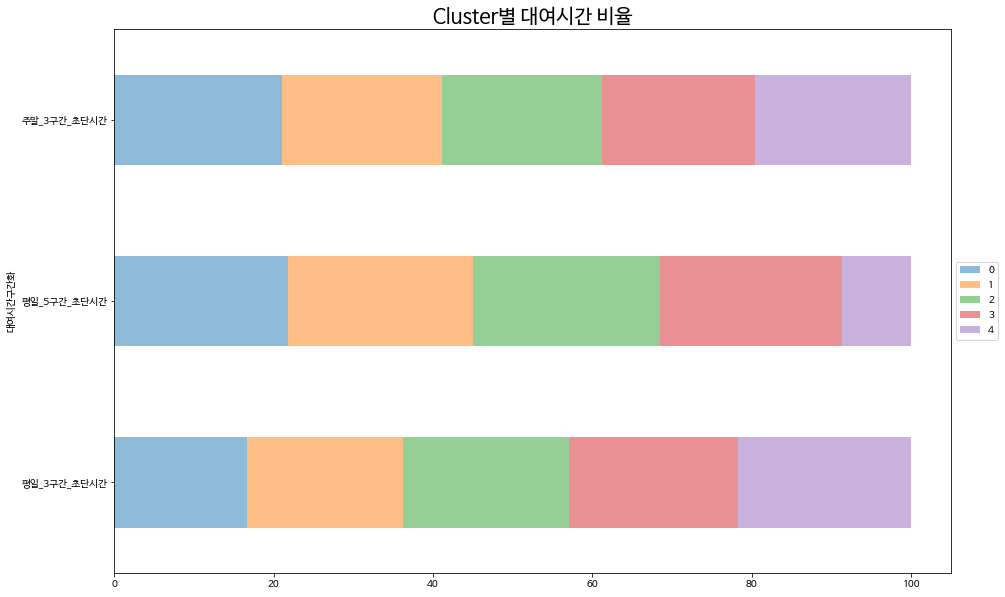

In [ ]:
cluster1_ratio = cluster1_hypotheses.T.div(cluster1_hypotheses.T.sum(), axis=1, level=1)*100

cluster1_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cluster별 대여시간 비율', fontsize=20);

### 1번 가설

#### 평일 3구간 초단시간(기각)

* 4위- feature 기각

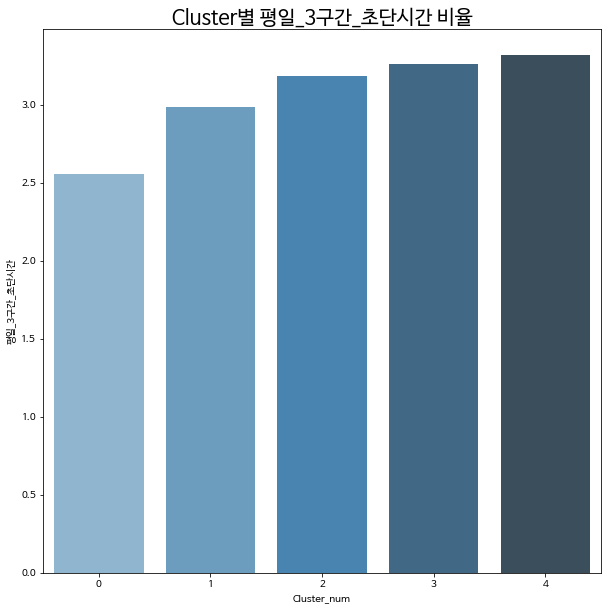

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_3구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster1_hypotheses.loc['평일_3구간_초단시간'].index,
            y=cluster1_hypotheses.loc['평일_3구간_초단시간'],
            palette='Blues_d')

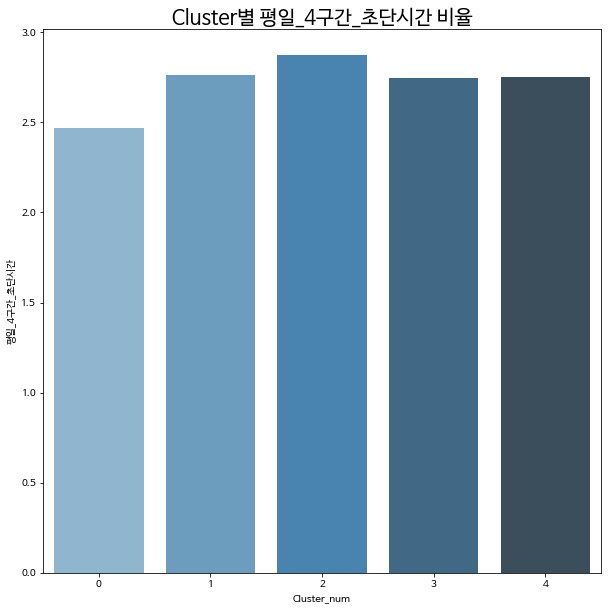

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_4구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_4구간_초단시간'].index,
            y=cluster_ratio.loc['평일_4구간_초단시간'],
            palette='Blues_d')

#### 평일 5구간 초단시간(채택)

* 1위- feature 채택

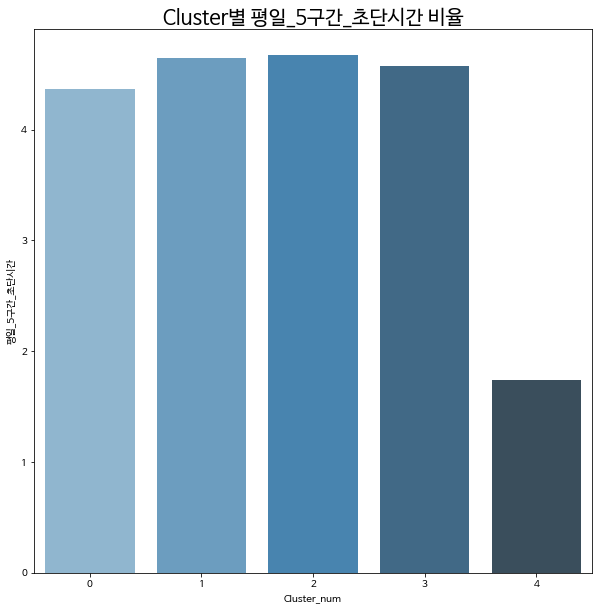

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_5구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster1_hypotheses.loc['평일_5구간_초단시간'].index,
            y=cluster1_hypotheses.loc['평일_5구간_초단시간'],
            palette='Blues_d')

### 2번 가설

#### 중간고사 수요(기각)

In [ ]:
midterm = preprocessed_df[((preprocessed_df['컬럼10']==4) & (preprocessed_df['컬럼11']>=26)) |  # 4월 26일 이후
                          ((preprocessed_df['컬럼10']==5) & (preprocessed_df['컬럼11']<=9)) |  # 5월 9일 이전
                          ((preprocessed_df['컬럼10']==10) & (preprocessed_df['컬럼11']>=21)) | # 10월 21일 이후
                          ((preprocessed_df['컬럼10']==11) & (preprocessed_df['컬럼11']<=2)) ] # 11월 2일 이전
midterm['Cluster_num'].value_counts()

1    9829
2    5942
0    4896
3    3815
4     201
Name: Cluster_num, dtype: int64

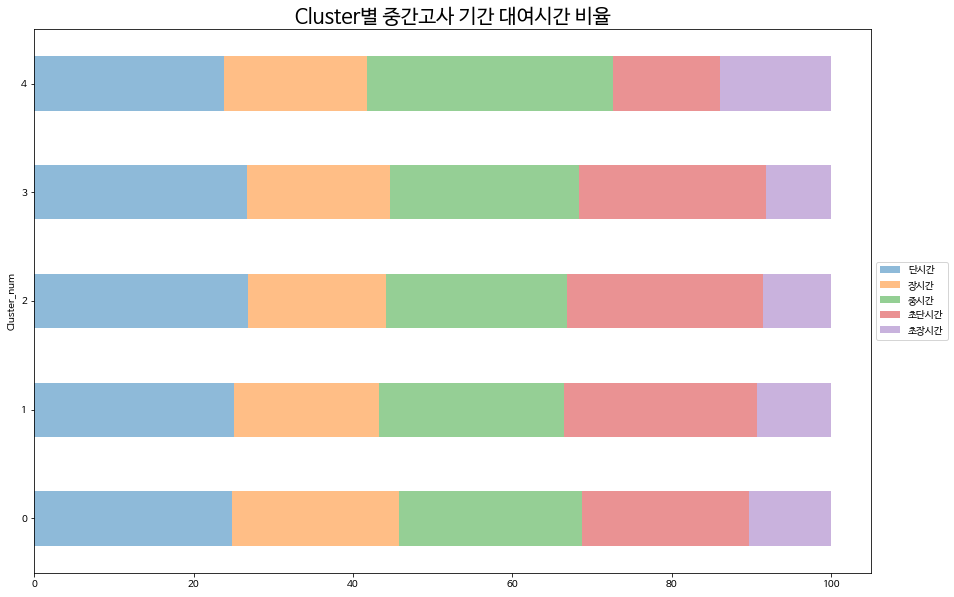

In [ ]:
midterm_distribution = pd.pivot_table(midterm, index='Cluster_num', columns='컬럼15_bin', values='컬럼6', aggfunc='count', fill_value=0)

midterm_ratio = midterm_distribution.T.div(midterm_distribution.T.sum(), axis=1, level=1)*100

midterm_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cluster별 중간고사 기간 대여시간 비율', fontsize=20);

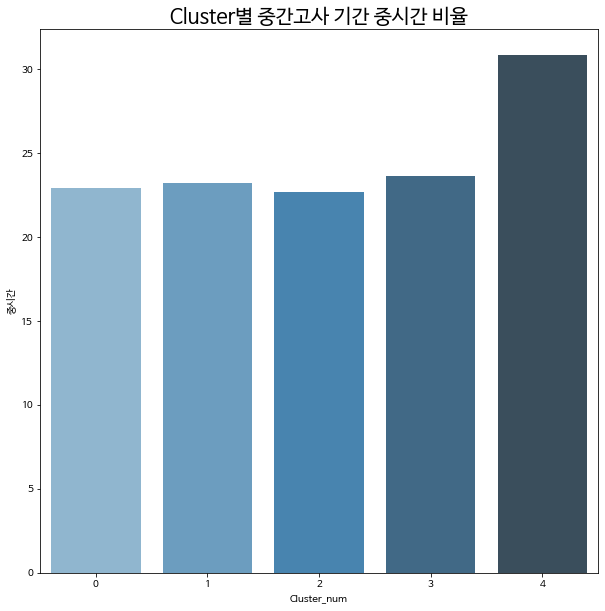

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 중간고사 기간 중시간 비율', fontsize=20)

sns.barplot(x=midterm_ratio.loc['중시간'].index,
            y=midterm_ratio.loc['중시간'],
            palette='Blues_d')

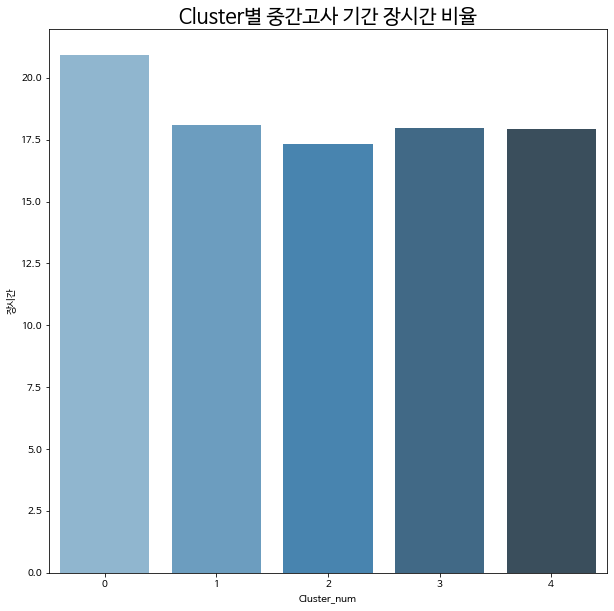

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 중간고사 기간 장시간 비율', fontsize=20)

sns.barplot(x=midterm_ratio.loc['장시간'].index,
            y=midterm_ratio.loc['장시간'],
            palette='Blues_d')

### 3번 가설

#### 주말 3구간 초단시간(보류)

* 3위 - feature 보류

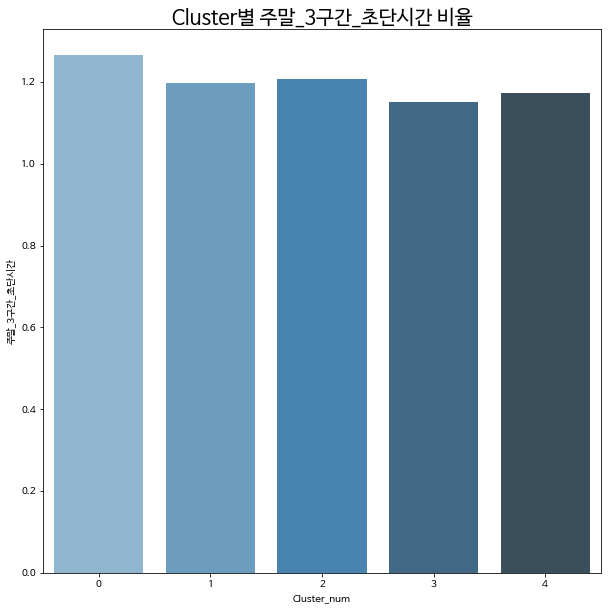

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_3구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster1_hypotheses.loc['주말_3구간_초단시간'].index,
            y=cluster1_hypotheses.loc['주말_3구간_초단시간'],
            palette='Blues_d')

### 4번 가설

#### 평일 1구간 장시간(채택)

* 1위- feature 채택

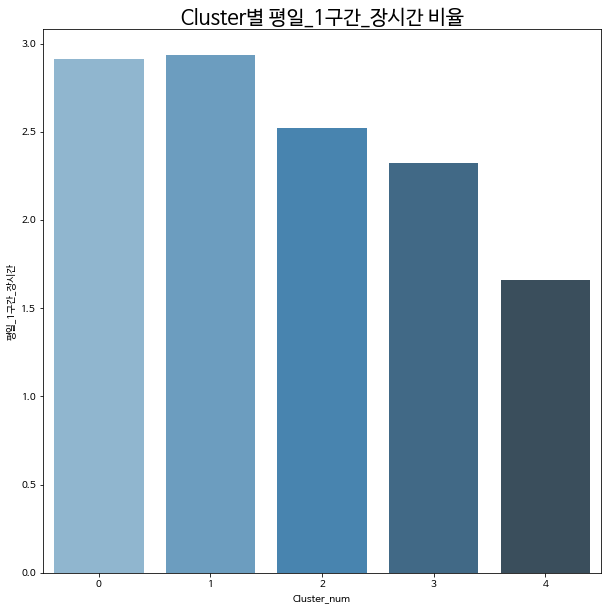

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_1구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_1구간_장시간'].index,
            y=cluster_ratio.loc['평일_1구간_장시간'],
            palette='Blues_d')

## Cluster2 가설

* 평일 3구간 초단시간

* 평일 5구간 초단시간

* 주말 3구간 초단시간

* 평일 1구간 장시간

* 평일 4구간 장시간

* 단시간, 초단시간 이용

### 1번 가설(1군집 가설)

#### 평일 3구간 초단시간(채택)

* 2위- feature 채택

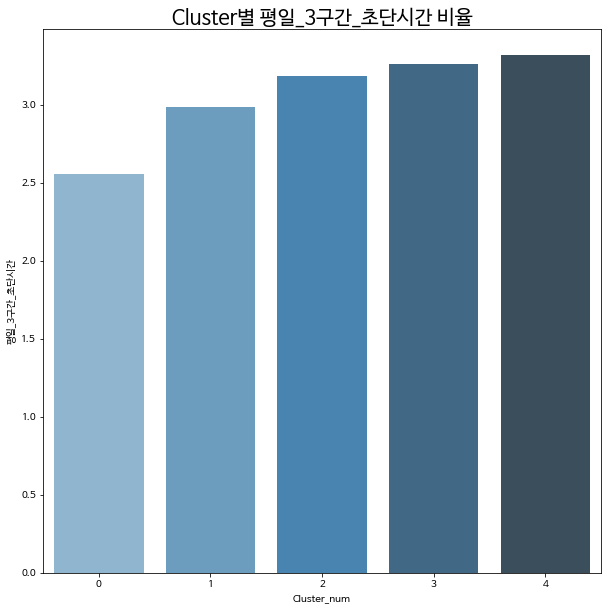

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_3구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster1_hypotheses.loc['평일_3구간_초단시간'].index,
            y=cluster1_hypotheses.loc['평일_3구간_초단시간'],
            palette='Blues_d')

#### 평일 5구간 초단시간(보류)

* 3위- feature 보류

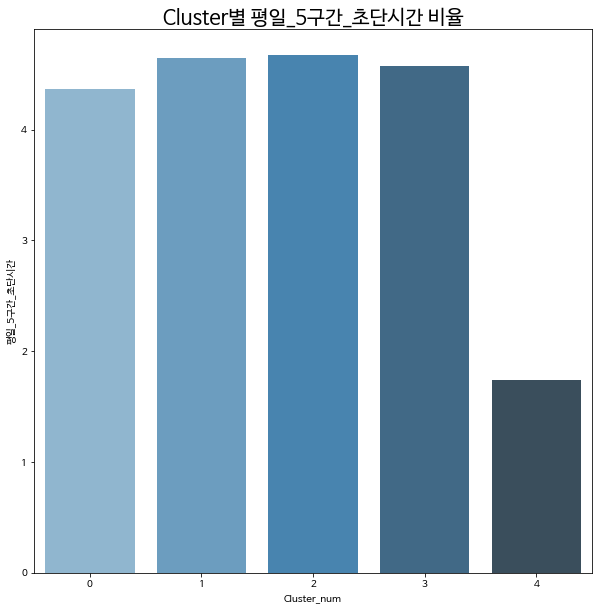

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_5구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster1_hypotheses.loc['평일_5구간_초단시간'].index,
            y=cluster1_hypotheses.loc['평일_5구간_초단시간'],
            palette='Blues_d')

#### 주말 3구간 초단시간(채택)

* 2위 - feature 채택

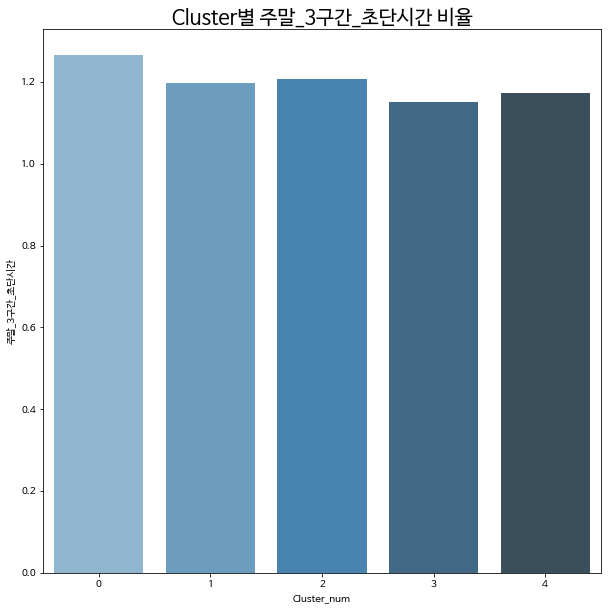

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_3구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster1_hypotheses.loc['주말_3구간_초단시간'].index,
            y=cluster1_hypotheses.loc['주말_3구간_초단시간'],
            palette='Blues_d')

### 2번 가설

#### 평일 1구간 장시간(보류)

* 3위 - feature 보류

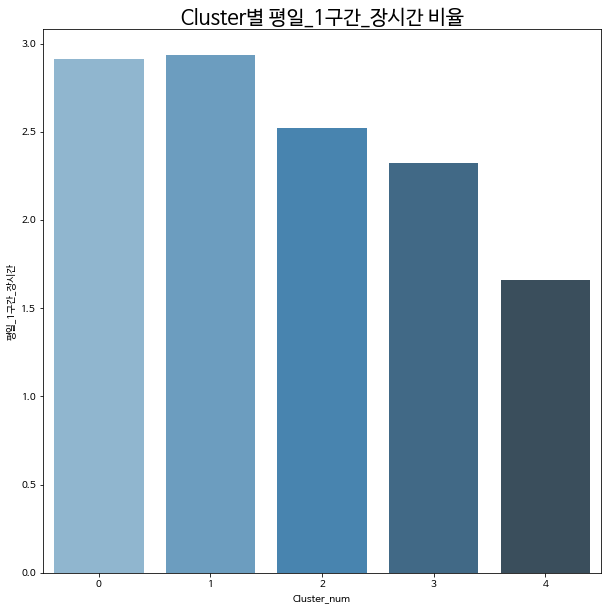

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_1구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_1구간_장시간'].index,
            y=cluster_ratio.loc['평일_1구간_장시간'],
            palette='Blues_d')

#### 평일 4구간 장시간(보류)

* 3위 - feature 보류

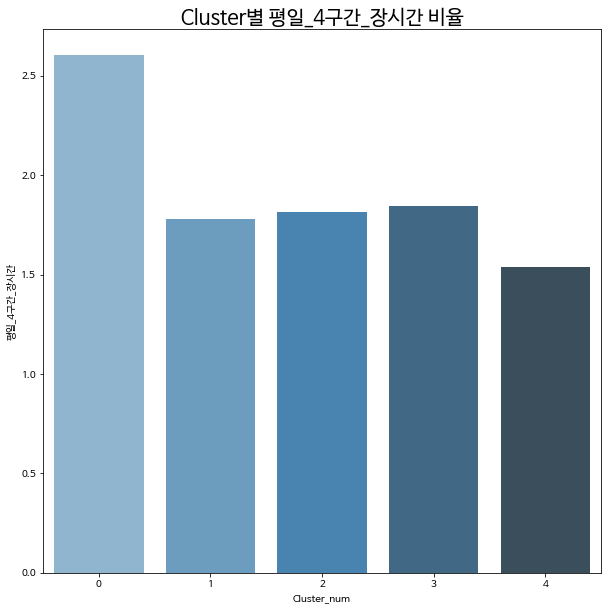

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_4구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_4구간_장시간'].index,
            y=cluster_ratio.loc['평일_4구간_장시간'],
            palette='Blues_d')

#### 군집별 제조업 비율

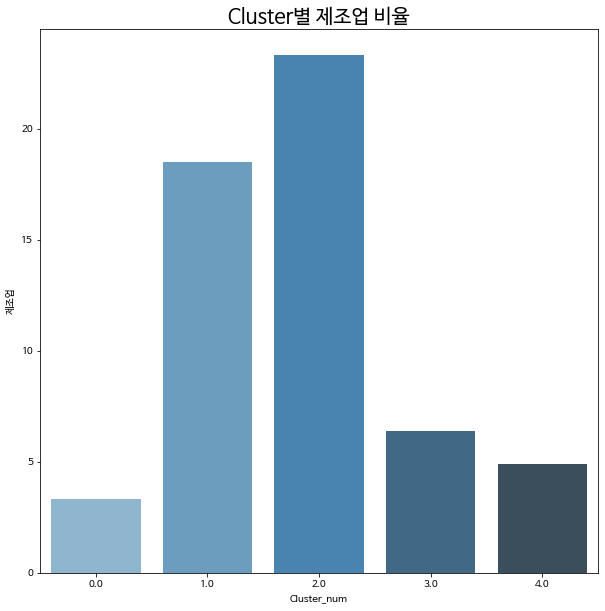

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 제조업 비율', fontsize=20)

sns.barplot(x=industry_p_ratio_t_cluster['제조업'].index,
            y=industry_p_ratio_t_cluster['제조업'],
            palette='Blues_d')

### 3번 가설

#### 단시간, 초단시간 이용

* 2위- feature 채택

In [ ]:
cluster_total_hour_distribution = pd.pivot_table(preprocessed_df, index='Cluster_num', columns='컬럼15_bin', values='컬럼7', aggfunc='count', fill_value=0)
cluster_total_hour_distribution['초단시간+단시간']=cluster_total_hour_distribution['초단시간']+cluster_total_hour_distribution['단시간']
cluster_total_hour_distribution = cluster_total_hour_distribution.drop(['초단시간','단시간'],axis=1)

cluster_total_hour_ratio = cluster_total_hour_distribution.T.div(cluster_total_hour_distribution.T.sum(), axis=1, level=1)*100
cluster_total_hour_ratio

Cluster_num,0,1,2,3,4
total_hours_bin,,,,,
장시간,18.984278,16.473570,15.673848,15.530690,13.349515
중시간,22.257430,22.185642,22.041392,22.426942,27.022654
초장시간,10.104985,9.412627,8.656136,7.591526,15.129450
초단시간+단시간,48.653307,51.928161,53.628624,54.450842,44.498382


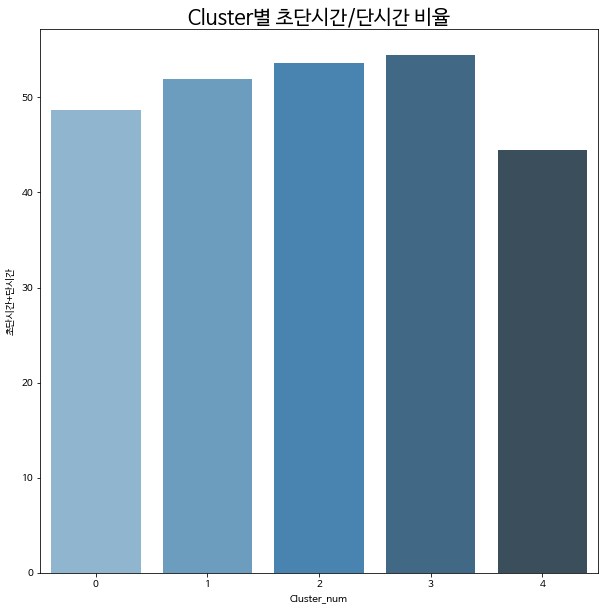

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 초단시간/단시간 비율', fontsize=20)

sns.barplot(x=cluster_total_hour_ratio.loc['초단시간+단시간'].index,
            y=cluster_total_hour_ratio.loc['초단시간+단시간'],
            palette='Blues_d')

## Cluster3 가설

* 주말 3구간 초단시간

* 평일 5구간 초단시간

* 평일 4구간 초단시간

* 평일 4구간 단시간

* 평일 5구간 단시간

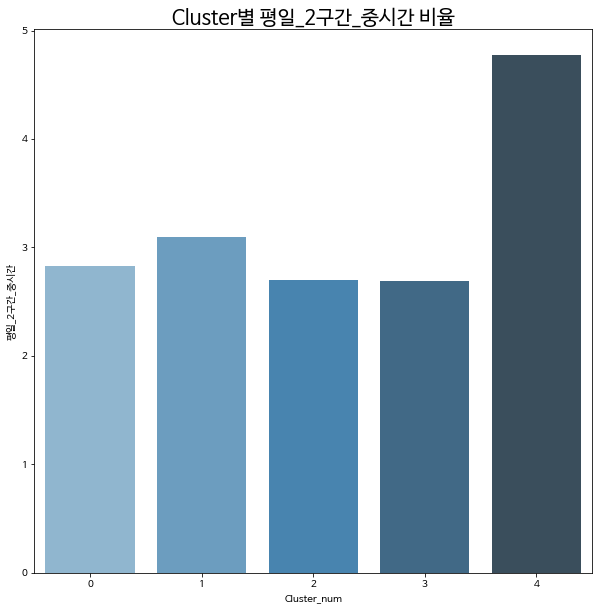

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_2구간_중시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_2구간_중시간'].index,
            y=cluster_ratio.loc['평일_2구간_중시간'],
            palette='Blues_d')

### 1번 가설

#### 평일 4구간 초단시간(보류)

* 3위- feature 보류

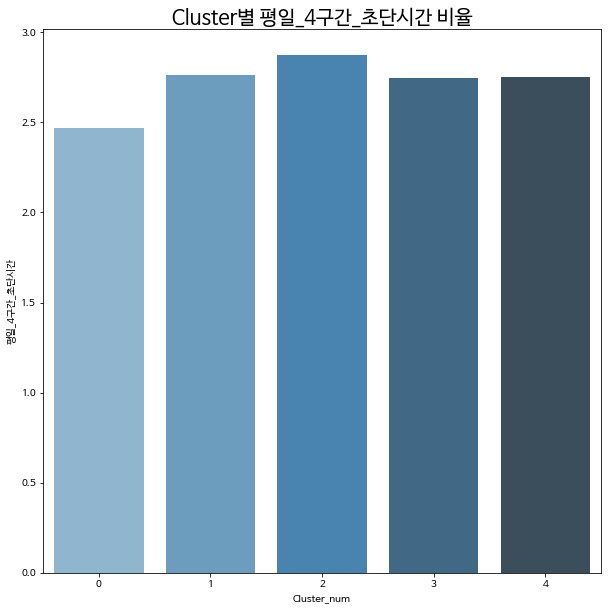

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_4구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_4구간_초단시간'].index,
            y=cluster_ratio.loc['평일_4구간_초단시간'],
            palette='Blues_d')

#### 평일 4구간 단시간(채택)

* 2위- feature 채택

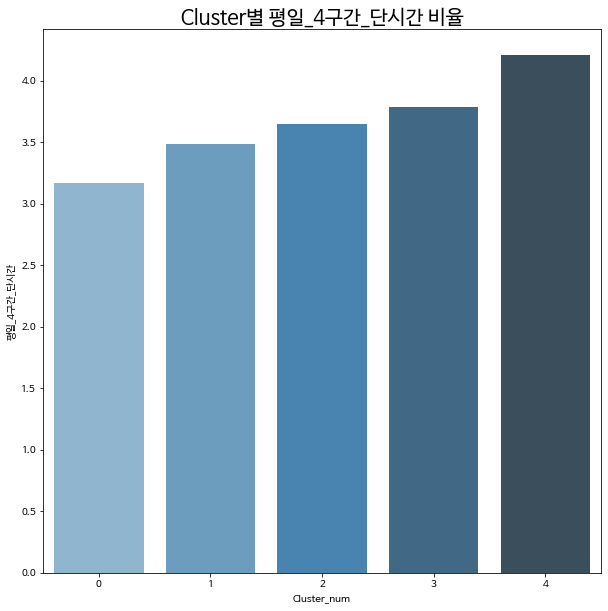

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_4구간_단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_4구간_단시간'].index,
            y=cluster_ratio.loc['평일_4구간_단시간'],
            palette='Blues_d')

#### 평일 5구간 초단시간(채택)

* 2위 - feature 채택

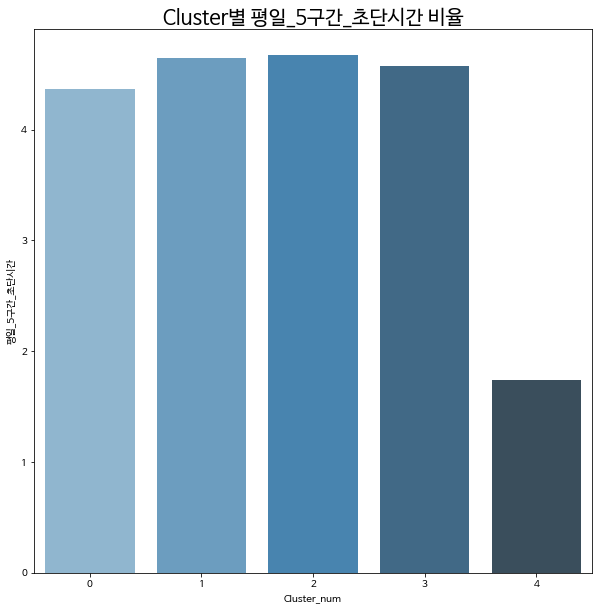

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_5구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_5구간_초단시간'].index,
            y=cluster_ratio.loc['평일_5구간_초단시간'],
            palette='Blues_d')

#### 평일 5구간 단시간(채택)

* 1위- feature 채택

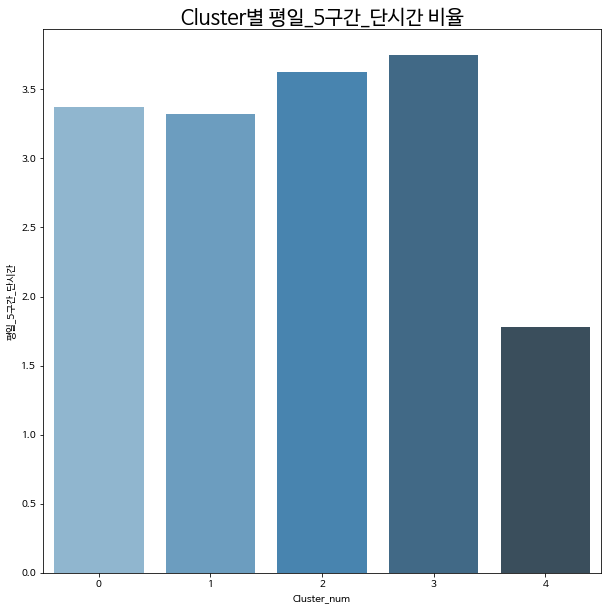

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_5구간_단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_5구간_단시간'].index,
            y=cluster_ratio.loc['평일_5구간_단시간'],
            palette='Blues_d')

#### 평일 6구간 초단시간(채택)

* 1위- feature 채택

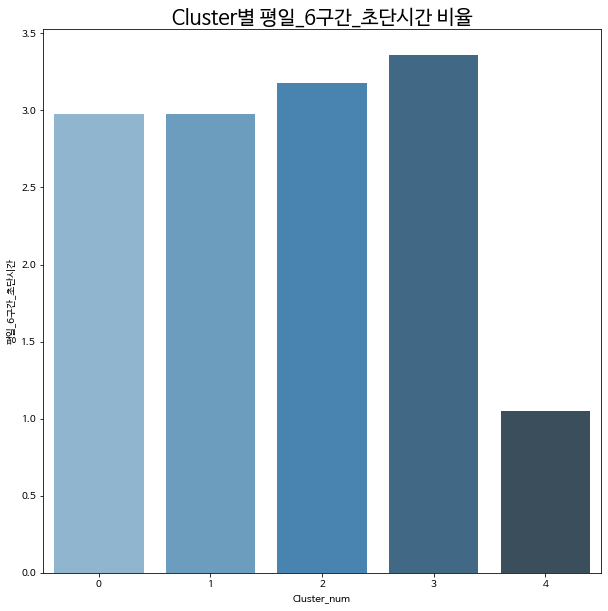

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_6구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_6구간_초단시간'].index,
            y=cluster_ratio.loc['평일_6구간_초단시간'],
            palette='Blues_d')

#### 평일 6구간 단시간(채택)

* 1위 - feature 채택

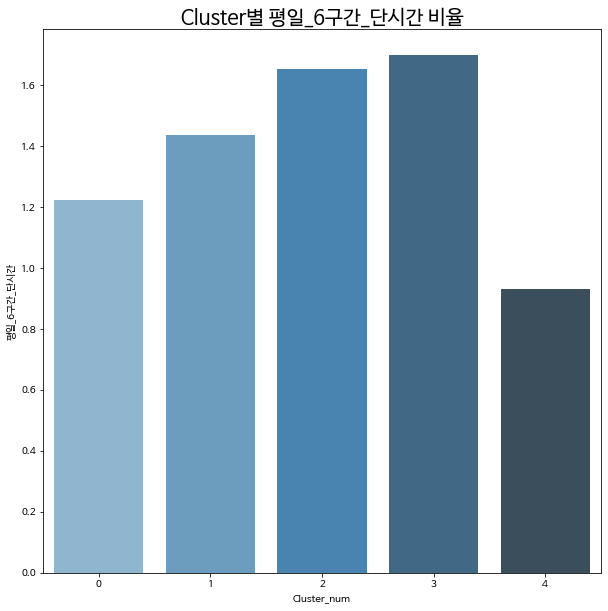

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_6구간_단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_6구간_단시간'].index,
            y=cluster_ratio.loc['평일_6구간_단시간'],
            palette='Blues_d')

### 1-1번 가설

#### 주말 3구간 초단시간(기각)

* 5위 - feature 기각

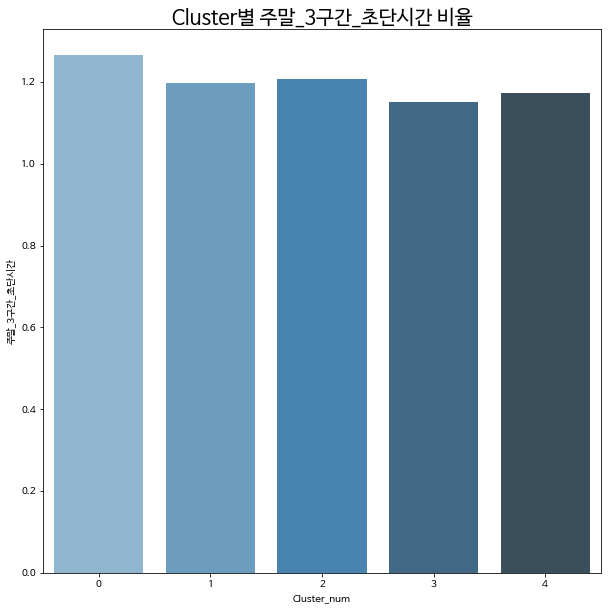

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_3구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_3구간_초단시간'].index,
            y=cluster_ratio.loc['주말_3구간_초단시간'],
            palette='Blues_d')

## Cluster4 가설

* 주말 2구간 중시간

* 주말 2구간 장시간

* 주말 2구간 초장시간

### Cluster4의 관광지적 특성

#### 군집별 컬럼17 이용비율

4군집의 주말 비율 가장 높음

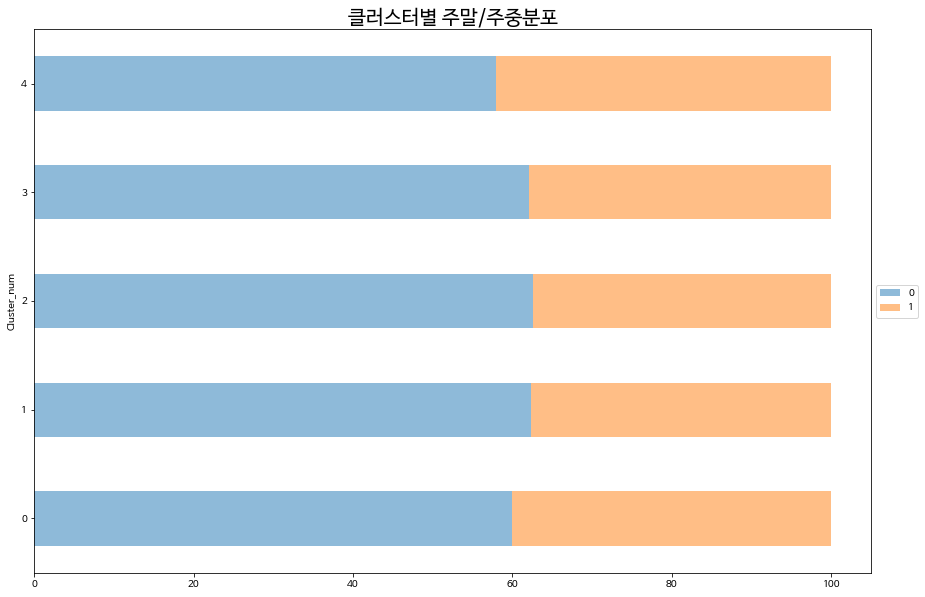

In [ ]:
car_distribution = pd.pivot_table(preprocessed_df, index='Cluster_num', columns='컬럼17', values='컬럼6', aggfunc='count', fill_value=0)

car_ratio = car_distribution.T.div(car_distribution.T.sum(), axis=1, level=1)*100

car_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('클러스터별 주말/주중분포', fontsize=20);

#### 쏘카 데이터 컬럼7별 컬럼15 분포

In [ ]:
pd.DataFrame(preprocessed_df.groupby('컬럼7').mean()['컬럼15'].sort_values())

#### Cluster4 컬럼7 분포


In [ ]:
feature7_distribution = pd.pivot_table(preprocessed_df, index='Cluster_num', columns='컬럼7', values='컬럼6', aggfunc='count', fill_value=0)

feature7_ratio = feature7_distribution.T.div(feature7_distribution.T.sum(), axis=1, level=1)*100

feature7_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('클러스터별 차종분포', fontsize=20);

In [ ]:
preprocessed_df[preprocessed_df['Cluster_num']==4].groupby('컬럼7').size()

#### 주말 구간별 군집 비율

In [ ]:
distribution = pd.pivot_table(preprocessed_df, index='Cluster_num', columns='컬럼13_bin', values='컬럼6', aggfunc='count', fill_value=0)

ratio = distribution.T.div(distribution.T.sum(), axis=1, level=1)*100
ratio

Cluster_num,0,1,2,3,4
start_hour_bin,,,,,
주말_1구간,4.566743,4.464241,4.159709,4.036936,3.559871
주말_2구간,14.730923,13.389354,12.871965,13.160239,20.266990
주말_3구간,7.084284,6.338514,6.531797,6.548615,8.050162
주말_4구간,8.912374,8.670832,9.010649,8.819120,7.888350
주말_5구간,4.693838,4.841453,4.898847,5.351439,2.224919
평일_1구간,6.850985,7.746325,6.768595,6.296578,4.490291
평일_2구간,9.840347,10.684876,9.867503,10.024986,12.783172
평일_3구간,12.415342,13.026455,13.782200,13.766431,17.758900
평일_4구간,12.065393,11.784517,12.257385,12.245519,12.944984


In [ ]:
weekend_r = ratio.loc[['주말_1구간', '주말_2구간', '주말_3구간', '주말_4구간', '주말_5구간']]
weekend_r

Cluster_num,0,1,2,3,4
start_hour_bin,,,,,
주말_1구간,4.566743,4.464241,4.159709,4.036936,3.559871
주말_2구간,14.730923,13.389354,12.871965,13.160239,20.266990
주말_3구간,7.084284,6.338514,6.531797,6.548615,8.050162
주말_4구간,8.912374,8.670832,9.010649,8.819120,7.888350
주말_5구간,4.693838,4.841453,4.898847,5.351439,2.224919


주말 2,3구간에서 Cluster4의 비중이 매우 높음

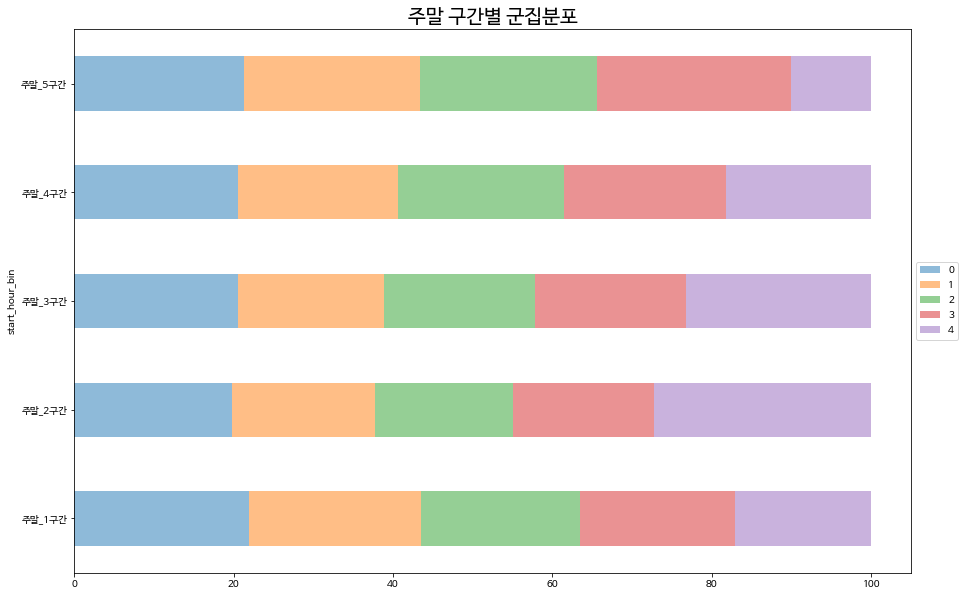

In [ ]:
weekend_ratio = weekend_r.T.div(weekend_r.T.sum(), axis=1, level=1)*100

weekend_ratio.T.plot.barh(alpha=0.5, stacked=True, figsize=(15, 10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('주말 구간별 군집분포', fontsize=20);

In [ ]:
weekend_ratio

start_hour_bin,주말_1구간,주말_2구간,주말_3구간,주말_4구간,주말_5구간
Cluster_num,,,,,
0,21.968697,19.794447,20.502438,20.582220,21.325454
1,21.475602,17.991735,18.344127,20.024403,21.996109
2,20.010626,17.296501,18.903500,20.809177,22.256869
3,19.420020,17.683865,18.952173,20.366860,24.313124
4,17.125055,27.233451,23.297761,18.217340,10.108445


### 주말 2구간 초단시간(채택)

* 1위- feature 채택

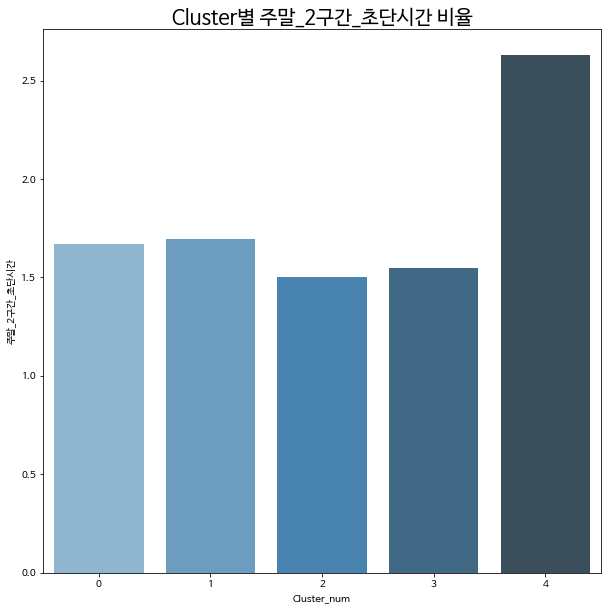

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_2구간_초단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_2구간_초단시간'].index,
            y=cluster_ratio.loc['주말_2구간_초단시간'],
            palette='Blues_d')

### 주말 2구간 단시간(채택)

* 1위 -채택

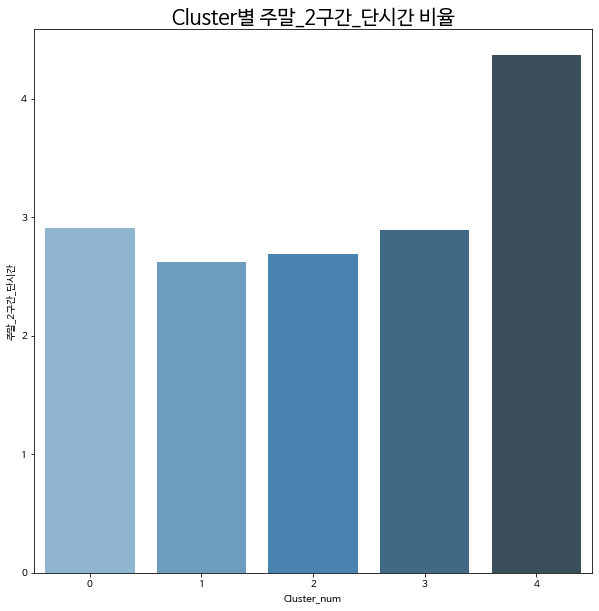

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_2구간_단시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_2구간_단시간'].index,
            y=cluster_ratio.loc['주말_2구간_단시간'],
            palette='Blues_d')

### 주말 2구간 중시간(채택)

* 1위- feature 채택

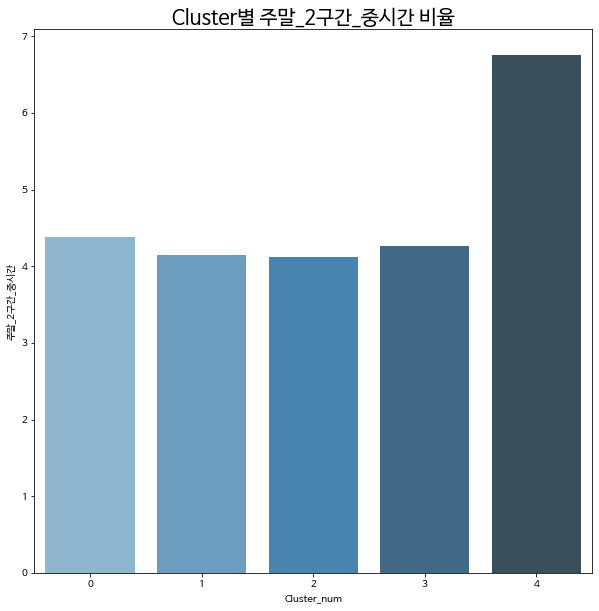

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_2구간_중시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_2구간_중시간'].index,
            y=cluster_ratio.loc['주말_2구간_중시간'],
            palette='Blues_d')

### 주말 2구간 장시간(기각)

* 5위 - feature 기각

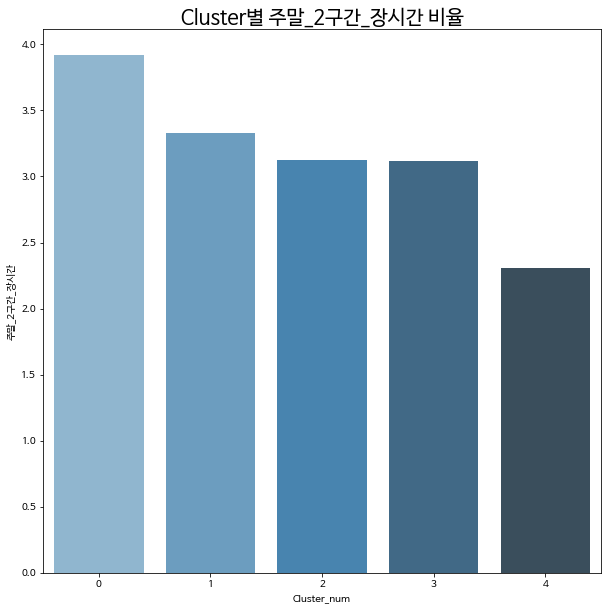

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_2구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_2구간_장시간'].index,
            y=cluster_ratio.loc['주말_2구간_장시간'],
            palette='Blues_d')

### 주말 2구간 초장시간(채택)

* 1위- feature 채택

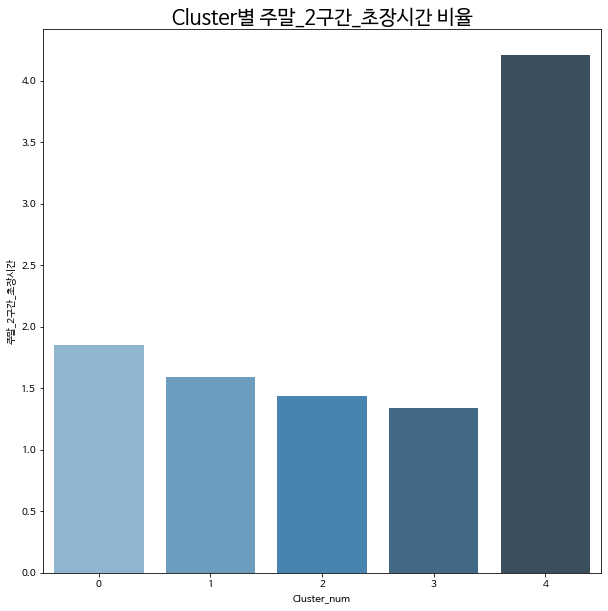

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_2구간_초장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_2구간_초장시간'].index,
            y=cluster_ratio.loc['주말_2구간_초장시간'],
            palette='Blues_d')

### 주말 1구간 초장시간

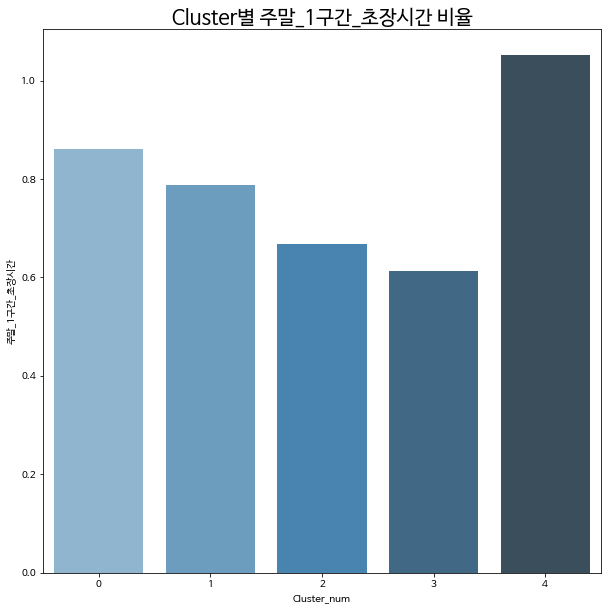

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_1구간_초장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_1구간_초장시간'].index,
            y=cluster_ratio.loc['주말_1구간_초장시간'],
            palette='Blues_d')

### 주말 4구간 장시간

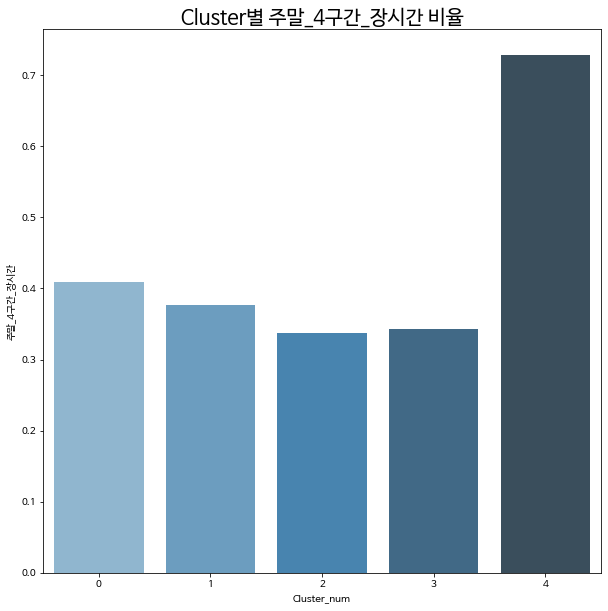

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 주말_4구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['주말_4구간_장시간'].index,
            y=cluster_ratio.loc['주말_4구간_장시간'],
            palette='Blues_d')

###평일 2구간 장시간

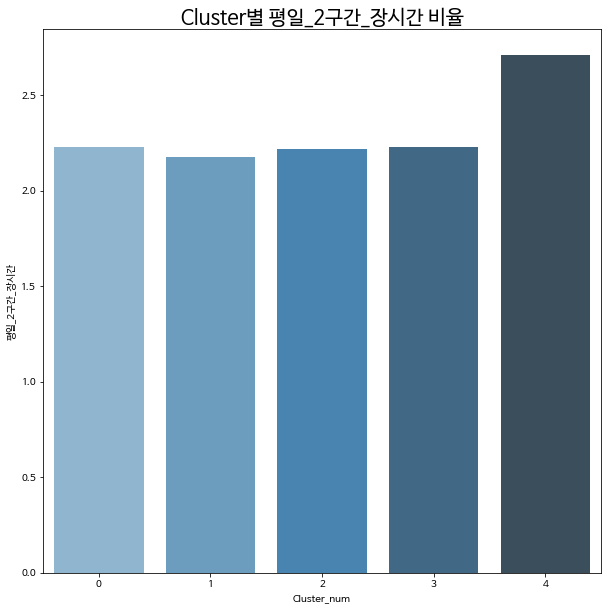

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 평일_2구간_장시간 비율', fontsize=20)

sns.barplot(x=cluster_ratio.loc['평일_2구간_장시간'].index,
            y=cluster_ratio.loc['평일_2구간_장시간'],
            palette='Blues_d')

### 군집별 숙박 및 음식점업 비율

* 4군집 1위

In [ ]:
industry_p_ratio_t_cluster['숙박 및 음식점업']

Cluster_num
0.0     8.373601
1.0    10.784525
2.0     9.922955
3.0    12.384549
4.0    20.979213
Name: 숙박 및 음식점업, dtype: float64

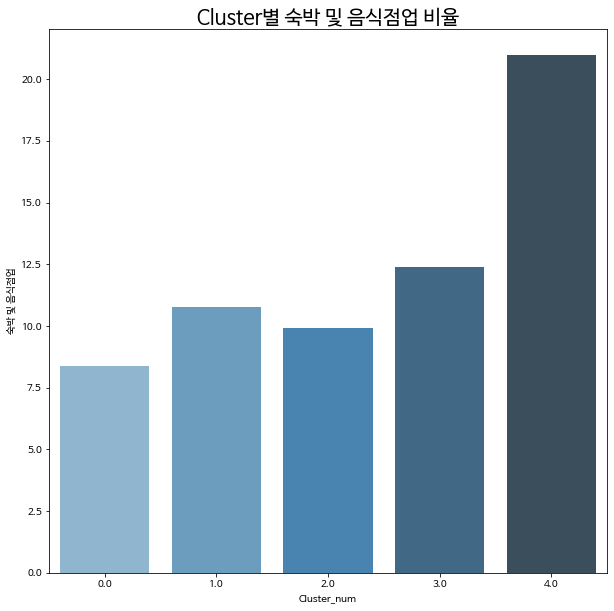

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cluster별 숙박 및 음식점업 비율', fontsize=20)

sns.barplot(x=industry_p_ratio_t_cluster['숙박 및 음식점업'].index,
            y=industry_p_ratio_t_cluster['숙박 및 음식점업'],
            palette='Blues_d')